<a href="https://colab.research.google.com/github/anega006/Autoencoders/blob/master/Denoising_Dirty_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install tensorflow==1.15
!pip install --upgrade tensorflow==1.15

     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 512kB 50.3MB/s 
     |████████████████████████████████| 3.8MB 44.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d458db9a53094366133e35b5e7cd8c1b3ead587e7c230e7df7f79132cf93679a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [0]:
!pip install httplib2==0.15.0

     |████████████████████████████████| 102kB 4.3MB/s 
ERROR: google-api-python-client 1.7.12 has requirement httplib2<1dev,>=0.17.0, but you'll have httplib2 0.15.0 which is incompatible.
  Found existing installation: httplib2 0.17.3
    Uninstalling httplib2-0.17.3:
      Successfully uninstalled httplib2-0.17.3


In [0]:
# Preparing to export data directly to google drive
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [0]:
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 

In [0]:
!rm -r /tmp/colab_util_repo

In [0]:
# Downloading the kaggle dataset
!pip install -U -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
# Upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anega006","key":"934a1a6e8aa9d251469304dd36a8119d"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Search the required dataset in kaggle datasets
!kaggle competitions list -s denoising-dirty-documents

ref                        deadline             category       reward  teamCount  userHasEntered  
-------------------------  -------------------  ----------  ---------  ---------  --------------  
denoising-dirty-documents  2015-10-05 23:59:00  Playground  Knowledge        161            True  


In [0]:
# Download the dataset in colab
!kaggle competitions download -c denoising-dirty-documents

 53% 5.00M/9.39M [00:00<00:00, 7.84MB/s]
100% 9.39M/9.39M [00:00<00:00, 13.8MB/s]
 79% 5.00M/6.30M [00:00<00:00, 16.9MB/s]
100% 6.30M/6.30M [00:00<00:00, 18.1MB/s]
 41% 9.00M/21.9M [00:00<00:00, 20.1MB/s]
100% 21.9M/21.9M [00:00<00:00, 44.6MB/s]
 27% 5.00M/18.5M [00:00<00:00, 19.8MB/s]
100% 18.5M/18.5M [00:00<00:00, 53.2MB/s]


In [0]:
# Remove unnecessary files
!rm -rf ./sampleSubmission.csv.zip

In [0]:
# Unzip train.zip
!unzip "./train.zip" 

Archive:  ./train.zip
   creating: train/
  inflating: train/101.png           
  inflating: train/102.png           
  inflating: train/104.png           
  inflating: train/105.png           
 extracting: train/107.png           
 extracting: train/108.png           
 extracting: train/11.png            
  inflating: train/110.png           
 extracting: train/111.png           
  inflating: train/113.png           
  inflating: train/114.png           
 extracting: train/116.png           
  inflating: train/117.png           
 extracting: train/119.png           
 extracting: train/12.png            
 extracting: train/120.png           
  inflating: train/122.png           
 extracting: train/123.png           
  inflating: train/125.png           
  inflating: train/126.png           
  inflating: train/128.png           
  inflating: train/129.png           
  inflating: train/131.png           
 extracting: train/132.png           
 extracting: train/134.png           
 extract

In [0]:
# Unzip train_cleaned.zip
!unzip "./train_cleaned.zip" 

Archive:  ./train_cleaned.zip
   creating: train_cleaned/
  inflating: train_cleaned/101.png   
  inflating: train_cleaned/102.png   
  inflating: train_cleaned/104.png   
  inflating: train_cleaned/105.png   
  inflating: train_cleaned/107.png   
  inflating: train_cleaned/108.png   
  inflating: train_cleaned/11.png    
  inflating: train_cleaned/110.png   
  inflating: train_cleaned/111.png   
  inflating: train_cleaned/113.png   
  inflating: train_cleaned/114.png   
  inflating: train_cleaned/116.png   
  inflating: train_cleaned/117.png   
  inflating: train_cleaned/119.png   
  inflating: train_cleaned/12.png    
  inflating: train_cleaned/120.png   
  inflating: train_cleaned/122.png   
  inflating: train_cleaned/123.png   
  inflating: train_cleaned/125.png   
  inflating: train_cleaned/126.png   
  inflating: train_cleaned/128.png   
  inflating: train_cleaned/129.png   
  inflating: train_cleaned/131.png   
  inflating: train_cleaned/132.png   
  inflating: train_cleaned/134

In [0]:
# Unzip test.zip
!unzip "./test.zip" 

Archive:  ./test.zip
   creating: test/
  inflating: test/1.png              
 extracting: test/10.png             
  inflating: test/100.png            
 extracting: test/103.png            
  inflating: test/106.png            
 extracting: test/109.png            
  inflating: test/112.png            
 extracting: test/115.png            
 extracting: test/118.png            
  inflating: test/121.png            
  inflating: test/124.png            
  inflating: test/127.png            
 extracting: test/13.png             
  inflating: test/130.png            
 extracting: test/133.png            
  inflating: test/136.png            
 extracting: test/139.png            
 extracting: test/142.png            
 extracting: test/145.png            
  inflating: test/148.png            
 extracting: test/151.png            
  inflating: test/154.png            
 extracting: test/157.png            
 extracting: test/16.png             
 extracting: test/160.png            
 extractin

In [0]:
# Remove zip files after unzipping
!rm -rf ./train.zip
!rm -rf ./train_cleaned.zip
!rm -rf ./test.zip

In [0]:
# Import necessary libraries
import os
import numpy as np
import pickle
import cv2
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Input, UpSampling2D, concatenate
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.


In [0]:
# Initilaize paths
TRAIN_IMAGES_PATH = "./train/"
TRAIN_CLEANED_IMAGES_PATH = "./train_cleaned/"
TEST_IMAGES_PATH = "./test/"
DUMP_DATA_PATH = "./pickled_data/"
LOGS_PATH = "./graphs/"
SAVE_MODEL_PATH = "./weights/"
SAVE_RESULTS_PATH = "./test_predictions/"

In [0]:
# Create all the required paths
def create_necessary_directories():
  if (not os.path.exists(DUMP_DATA_PATH)):
    os.mkdir(DUMP_DATA_PATH)
  if (not os.path.exists(SAVE_MODEL_PATH)):
    os.mkdir(SAVE_MODEL_PATH)
  if (not os.path.exists(LOGS_PATH)):
    os.mkdir(LOGS_PATH)
  if (not os.path.exists(SAVE_RESULTS_PATH)):
    os.mkdir(SAVE_RESULTS_PATH)

create_necessary_directories()

In [0]:
# Initialize parameters
RESIZE_WIDTH = 540
RESIZE_HEIGHT = 258
TRAIN_SET_RATIO = 0.8
VAL_SET_RATIO = 0.2
OPTIMIZER = 'adam' 
LOSS_FUNCTION = 'mean_squared_error'
BATCH_SIZE = 16
EPOCHS = 250

In [0]:
# Creating list of images in sorted manner
# So that training_images remain binded with cleaned_training_images
train_images = sorted(os.listdir(TRAIN_IMAGES_PATH))
train_cleaned_images = sorted(os.listdir(TRAIN_CLEANED_IMAGES_PATH))
test_images = sorted(os.listdir(TEST_IMAGES_PATH))

In [0]:
#Function to preprocess images
def preprocess_data():

    print("Total number of images in the training set: ", len(train_images))
    print("Total number of cleaned training images: ", len(train_cleaned_images))
    print("Total number of images in the testing set: ", len(test_images))
    
    #Initialize empty lists
    oTrainImages = []
    oCleanTrainImages = []
    oTestImages = []

    #Preprocessing train_images
    for filename in train_images:
        oImg = cv2.imread(os.path.join(TRAIN_IMAGES_PATH, filename), 0)
        oResizedImg = cv2.resize(oImg, (RESIZE_WIDTH, RESIZE_HEIGHT))  
        oReshapedImg = oResizedImg.reshape(RESIZE_HEIGHT, RESIZE_WIDTH, 1)
        oNormalizedImg = oReshapedImg.astype('float32')/255.0
        oTrainImages.append(oNormalizedImg)

    #Preprocessing train_cleaned_images
    for filename in train_cleaned_images:
        oImg = cv2.imread(os.path.join(TRAIN_CLEANED_IMAGES_PATH, filename), 0)
        oResizedImg = cv2.resize(oImg, (RESIZE_WIDTH, RESIZE_HEIGHT))  
        oReshapedImg = oResizedImg.reshape(RESIZE_HEIGHT, RESIZE_WIDTH, 1)
        oNormalizedImg = oReshapedImg.astype('float32')/255.0
        oCleanTrainImages.append(oNormalizedImg)

    #Preprocessing test_images
    for filename in test_images:
        oImg = cv2.imread(os.path.join(TEST_IMAGES_PATH, filename), 0)
        oResizedImg = cv2.resize(oImg, (RESIZE_WIDTH, RESIZE_HEIGHT))
        oReshapedImg = oResizedImg.reshape(RESIZE_HEIGHT, RESIZE_WIDTH, 1)
        oNormalizedImg = oReshapedImg.astype('float32')/255.0
        oTestImages.append(oNormalizedImg)

    #Conversion to a numpy array
    oTrainImagesNp = np.array(oTrainImages) 
    oCleanTrainImagesNp = np.array(oCleanTrainImages)    
    oTestImagesNp = np.array(oTestImages)       

    return (oTrainImagesNp, oCleanTrainImagesNp, oTestImagesNp)

In [0]:
#Preprocess the data
oTrainImagesNp, oCleanTrainImagesNp, oTestImagesNp = preprocess_data()

Total number of images in the training set:  144
Total number of cleaned training images:  144
Total number of images in the testing set:  72


In [0]:
#Function to split data into training & validation images
def train_val_split(oTrainImagesNp, oCleanTrainImagesNp):
    #zip and shuffle inputs and labels
    oInputLabel = []
    for oInput, oLabel in zip(oTrainImagesNp, oCleanTrainImagesNp):
        oEachInputLabel = zip(oInput, oLabel)
        oInputLabel.append(oEachInputLabel)
    oInputLabelNp = np.array(oInputLabel)
    
    # Shuffle the data before split
    np.random.seed(7)
    np.random.shuffle(oInputLabelNp)

    # unzip the input and labels
    oTrainImages = [] 
    oCleanTrainImages = []
    for oEachInputLabel in oInputLabelNp:
        oInput, oLabel = zip(*oEachInputLabel)
        oTrainImages.append(oInput)
        oCleanTrainImages.append(oLabel)

    oTrainImagesNp = np.array(oTrainImages)
    oCleanTrainImagesNp = np.array(oCleanTrainImages)

    # get size of training images
    iTotalSize = oTrainImagesNp.shape[0]	# oTrainImagesNp.shape[0] == oCleanTrainImagesNp.shape[0]      
    
    iTrainSize = int(iTotalSize*TRAIN_SET_RATIO)
    oTrainDataNp = oTrainImagesNp[0:iTrainSize]
    oTrainLabelNp = oCleanTrainImagesNp[0:iTrainSize]
    
    iValSize = int(iTotalSize*VAL_SET_RATIO)
    oValDataNp = oTrainImagesNp[iTrainSize:iTrainSize+iValSize+1]
    oValLabelNp = oCleanTrainImagesNp[iTrainSize:iTrainSize+iValSize+1]

    return (oTrainDataNp, oValDataNp, oTrainLabelNp, oValLabelNp)

In [0]:
#Split training data into train and validation set
oTrainDataNp, oValDataNp, oTrainLabelNp, oValLabelNp = train_val_split(oTrainImagesNp, oCleanTrainImagesNp)

In [0]:
#Function to pickle dump the data
def pickle_dump_data(oTrainDataNp, oTrainLabelNp, oValDataNp, oValLabelNp, oTestDataNp):

    #Pickling & dumping training images
    pickling_on=open(DUMP_DATA_PATH+"oTrainDataNp.pickle","wb")
    pickle.dump(oTrainDataNp,pickling_on)
    pickling_on.close()

    #Pickling & dumping training labels
    pickling_on=open(DUMP_DATA_PATH+"oTrainLabelNp.pickle","wb")
    pickle.dump(oTrainLabelNp,pickling_on)
    pickling_on.close()

    #Pickling & dumping validation images
    pickling_on=open(DUMP_DATA_PATH+"oValDataNp.pickle","wb")
    pickle.dump(oValDataNp,pickling_on)
    pickling_on.close()

    #Pickling & dumping validation labels
    pickling_on=open(DUMP_DATA_PATH+"oValLabelNp.pickle","wb")
    pickle.dump(oValLabelNp,pickling_on)
    pickling_on.close()

    #Pickling & dumping testing images
    pickling_on=open(DUMP_DATA_PATH+"oTestDataNp.pickle","wb")
    pickle.dump(oTestDataNp,pickling_on)
    pickling_on.close()

In [0]:
#Pickle dump the data
pickle_dump_data(oTrainDataNp, oTrainLabelNp, oValDataNp, oValLabelNp, oTestImagesNp)

In [0]:
#Function to create denoising autoencoder
def autoencoder():

    #Input layer
    input_img = Input(shape=(RESIZE_HEIGHT, RESIZE_WIDTH, 1))

    #encoder
    c1 = Conv2D(64, (3,3), activation='relu', padding='same')(input_img) 
    p1 = MaxPooling2D(pool_size=(2,2))(c1)
    c2 = Conv2D(64, (3,3), activation='relu', padding='same')(p1) 
    encoded = Conv2D(64, (3,3), activation='relu', padding='same', name="encoder_output")(c2) 
    
    #decoder
    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
    p3 = UpSampling2D(size=(2, 2))(c3)
    u1 = concatenate([c1, p3])
    c4 = Conv2D(64, (3,3), activation='relu', padding='same')(u1)
    decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same', name="decoder_output")(c4)
    
    autoencoder = Model(inputs=input_img, outputs=decoded, name="Denoising Image Model")

    #Compile the model
    autoencoder.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=['accuracy'])

    return autoencoder

In [0]:
# Initialize autoencoder model
model = autoencoder()

# Print model summary
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "Denoising Image Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 258, 540, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 258, 540, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 129, 270, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 129, 270, 64) 36928       max_pooling2d_1[0][0]         

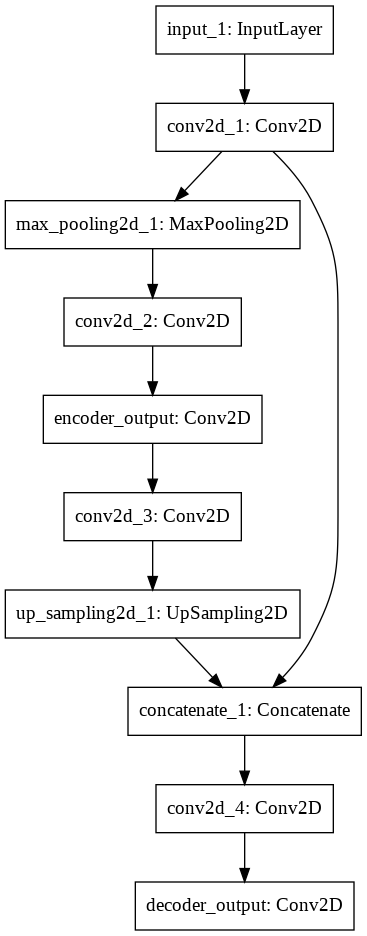

In [0]:
# Plot model summary to an image
plot_model(model, to_file='model_summary.png')

In [0]:
# Define filepath for each model to be saved
oWeightFilePath = os.path.join(SAVE_MODEL_PATH, "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5")

# Create model checkpoint callback
iEpochs = 4
checkpoint_callback = ModelCheckpoint(oWeightFilePath, monitor='val_loss', verbose = 1, period=iEpochs)

# Create tensorboard callback
tensorboard_callback = TensorBoard(log_dir=LOGS_PATH, batch_size=BATCH_SIZE, write_graph=True, write_grads=True, write_images=True, update_freq='epoch')

In [0]:
# Train the model
history = model.fit(oTrainDataNp, oTrainLabelNp, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, callbacks=[checkpoint_callback, tensorboard_callback], validation_data=(oValDataNp, oValLabelNp))


Train on 115 samples, validate on 29 samples


Epoch 1/250
115/115 [==============================] - 21s 180ms/step - loss: 0.1001 - accuracy: 0.6454 - val_loss: 0.0779 - val_accuracy: 0.6386

Epoch 2/250
115/115 [==============================] - 8s 67ms/step - loss: 0.0712 - accuracy: 0.6454 - val_loss: 0.0532 - val_accuracy: 0.6386
Epoch 3/250
115/115 [==============================] - 8s 68ms/step - loss: 0.0504 - accuracy: 0.6454 - val_loss: 0.0441 - val_accuracy: 0.6386
Epoch 4/250
115/115 [==============================] - 8s 68ms/step - loss: 0.0365 - accuracy: 0.6494 - val_loss: 0.0252 - val_accuracy: 0.6483

Epoch 00004: saving model to ./weights/weights-improvement-04-0.65.hdf5
Epoch 5/250
115/115 [==============================] - 8s 68ms/step - loss: 0.0198 - accuracy: 0.6576 - val_loss: 0.0270 - val_accuracy: 0.6458
Epoch 6/250
115/115 [==============================] - 8s 68ms/step - loss: 0.0189 - accuracy: 0.6571 - val_loss: 0.0159 - val_accuracy: 0.6485
Epoch 7/250


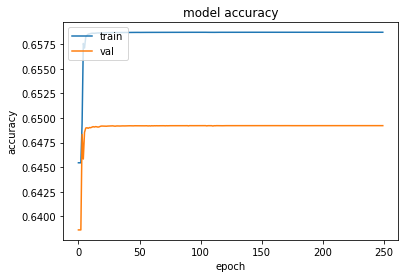

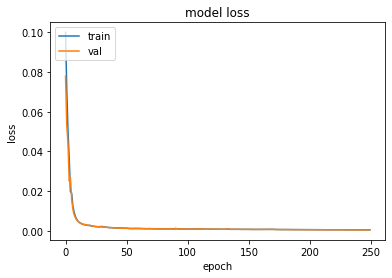

In [0]:
#Function to plot model history
def plot_model_history(history):
  
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('accuracy_curve.png')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('loss_curve.png')
    plt.show()

#Plot model history
plot_model_history(history)

In [0]:
#Load the best model
model = load_model("./weights/weights-improvement-248-0.65.hdf5")

# Save the model and weights as autoencoder model
model.save('./denoising_autoencoder.h5')

In [0]:
#Evaluate the model
oTrainScore = model.evaluate(oTrainDataNp, oTrainLabelNp, batch_size=BATCH_SIZE)
oValScore = model.evaluate(oValDataNp, oValLabelNp, batch_size=BATCH_SIZE)

print("oTrainScore: " , oTrainScore)
print("oValScore: ", oValScore)

29/29 [==============================] - 1s 19ms/step
oTrainScore:  [0.0005007926035550949, 0.6587116122245789]
oValScore:  [0.0004853985376720285, 0.6492188572883606]


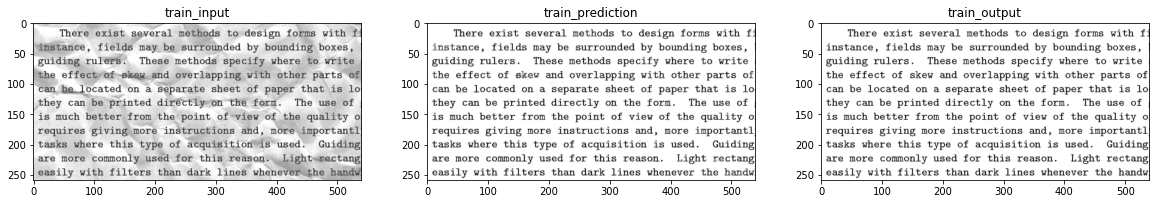

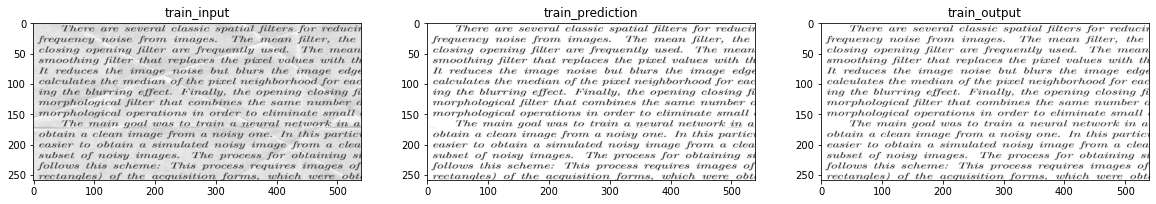

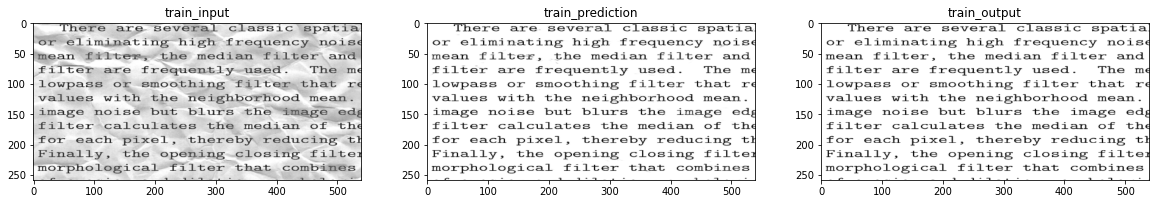

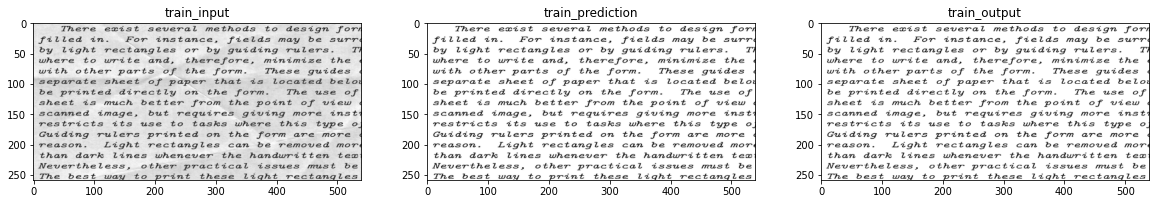

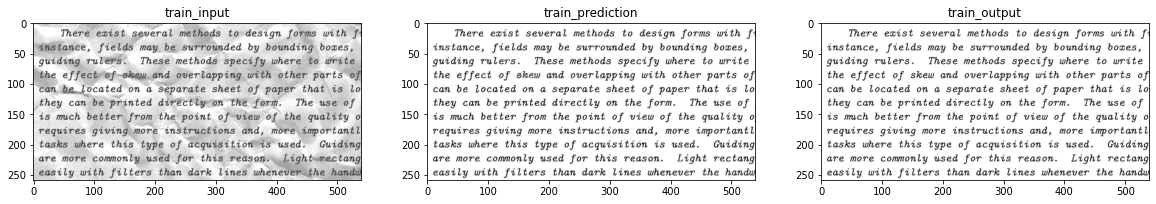

In [0]:
# Function to plot model predictions on training data
def show_train_results(oTrainDataNp, oTrainLabelNp, oTrainPredictionsNp):
    n = 5
    for i in range(1, n+1):
        train_input = (oTrainDataNp[i]*255.0).reshape(RESIZE_HEIGHT, RESIZE_WIDTH)
        train_prediction= (oTrainPredictionsNp[i]*255.0).reshape(RESIZE_HEIGHT, RESIZE_WIDTH)
        train_output = (oTrainLabelNp[i]*255.0).reshape(RESIZE_HEIGHT, RESIZE_WIDTH)
        
        f, ax = plt.subplots(1,3, figsize=(20,18))
        ax[0].imshow(np.squeeze(train_input), cmap='gray')
        ax[0].title.set_text('train_input')
        ax[1].imshow(np.squeeze(train_prediction), cmap='gray')
        ax[1].title.set_text('train_prediction')
        ax[2].imshow(np.squeeze(train_output), cmap='gray')
        ax[2].title.set_text('train_output')
        plt.show()


oTrainPredictionsNp = model.predict(oTrainDataNp)
show_train_results(oTrainDataNp, oTrainLabelNp, oTrainPredictionsNp)

In [0]:
#Calculate predictions of model on test data
oTestPredictionsNp = model.predict(oTestImagesNp)

print("oTestImagesNp.shape", oTestImagesNp.shape)
print("oTestPredictionsNp.shape", oTestPredictionsNp.shape)

oPredictionsNp = np.ravel(oTestPredictionsNp)
oTestActualsNp  = np.ravel(oTestImagesNp)

print("oTestActualsNp.shape", oTestActualsNp.shape)
print("oPredictionsNp.shape", oPredictionsNp.shape)

oTestImagesNp.shape (72, 258, 540, 1)
oTestPredictionsNp.shape (72, 258, 540, 1)
oTestActualsNp.shape (10031040,)
oPredictionsNp.shape (10031040,)


In [0]:
# Calculating Mean Sqaured error & Mean Absolute Error on Test data
y_true = oTestActualsNp
y_prediction = oPredictionsNp

print("Calculating Mean Squared Error...")
print(mean_squared_error(y_true, y_prediction))

print("Calculating Mean Absolute Error...")
print(mean_absolute_error(y_true, y_prediction))

Calculating Mean Squared Error...
0.036619507
Calculating Mean Absolute Error...
0.16015136


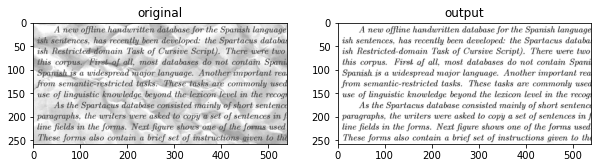

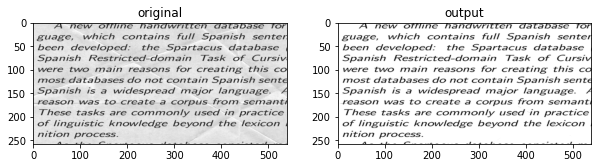

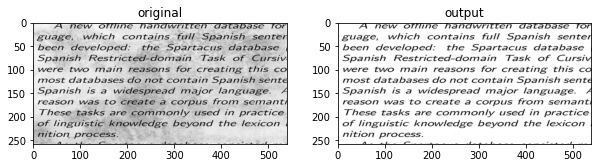

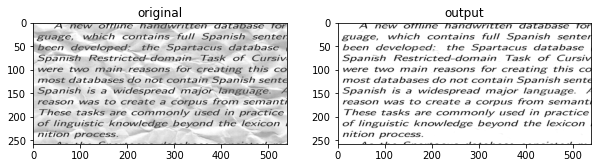

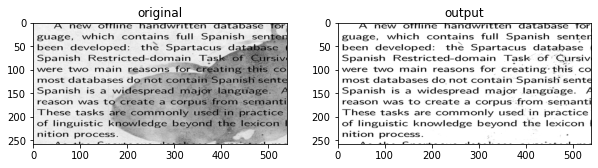

In [0]:
#Function to print the test results
def save_test_results(oTestDataNp, oTestPredictionsNp):
    n = 5
    for i in range(1, n+1):
        actual_img = (oTestImagesNp[i]*255.0).reshape(RESIZE_HEIGHT, RESIZE_WIDTH)
        test_result= (oTestPredictionsNp[i]*255.0).reshape(RESIZE_HEIGHT, RESIZE_WIDTH)
        
        f, ax = plt.subplots(1,2, figsize=(10,9))
        ax[0].imshow(np.squeeze(actual_img), cmap='gray')
        ax[0].title.set_text('original')
        ax[1].imshow(np.squeeze(test_result), cmap='gray')
        ax[1].title.set_text('output')
        plt.savefig(os.path.join(SAVE_RESULTS_PATH, "test" + str(i) + ".png"))
        plt.show()

#Save test results
save_test_results(oTestImagesNp, oTestPredictionsNp)

In [0]:
# Configure Google drive to export data
from colab_util import *
drive_handler = GoogleDriveHandler()

In [0]:
def upload_files_to_drive(archive_name, files_to_be_archived):

  # Create a combined tar file
  tar_file_path = create_archive(archive_name, local_file_paths=files_to_be_archived, temp_folder='.', verbose=True)
  
  # Create folder inside google drive 
  project_folder_id = drive_handler.create_folder('Denoising_Dirty_Documents')

  # Upload the data
  drive_handler.upload(tar_file_path, parent_path='Denoising_Dirty_Documents')

In [0]:
# Upload processed image np arrays to google drive
upload_files_to_drive(archive_name="image_array_archive", 
                      files_to_be_archived = ["./pickled_data/oTrainDataNp.pickle",
                                              "./pickled_data/oTrainLabelNp.pickle",
                                              "./pickled_data/oValDataNp.pickle",
                                              "./pickled_data/oValLabelNp.pickle",
                                              "./pickled_data/oTestDataNp.pickle"])

ignore the common prefix ./pickled_data/
running shell command: 
tar -czvf ./image_array_archive.tar.gz -C ./pickled_data/ oTrainDataNp.pickle oTrainLabelNp.pickle oValDataNp.pickle oValLabelNp.pickle oTestDataNp.pickle
oTrainDataNp.pickle
oTrainLabelNp.pickle
oValDataNp.pickle
oValLabelNp.pickle
oTestDataNp.pickle



In [0]:
# Upload model summary and curves to google drive
upload_files_to_drive(archive_name="curves_and_summary_archive", 
                      files_to_be_archived = ["./model_summary.png",
                                              "./accuracy_curve.png",
                                              "./loss_curve.png"])

ignore the common prefix ./
running shell command: 
tar -czvf ./curves_and_summary_archive.tar.gz -C ./ model_summary.png accuracy_curve.png loss_curve.png
model_summary.png
accuracy_curve.png
loss_curve.png

Denoising_Dirty_Documents already exists


In [0]:
# Upload the best model and weights to google drive
upload_files_to_drive(archive_name="model_weights_archive", 
                      files_to_be_archived = ["./denoising_autoencoder.h5"])

ignore the common prefix ./
running shell command: 
tar -czvf ./model_weights_archive.tar.gz -C ./ denoising_autoencoder.h5
denoising_autoencoder.h5

Denoising_Dirty_Documents already exists


In [0]:
# Upload the tensorboard graph to google drive
upload_files_to_drive(archive_name="tensorboard_graph_archive", 
                      files_to_be_archived = ["./graphs/events.out.tfevents.1589862137.720f07e948f3"])

ignore the common prefix ./graphs/
running shell command: 
tar -czvf ./tensorboard_graph_archive.tar.gz -C ./graphs/ events.out.tfevents.1589862137.720f07e948f3
events.out.tfevents.1589862137.720f07e948f3

Denoising_Dirty_Documents already exists


In [0]:
# Upload test data predictions to google drive
upload_files_to_drive(archive_name="test_predictions_archive", 
                      files_to_be_archived = ["./test_predictions/test1.png",
                                              "./test_predictions/test2.png",
                                              "./test_predictions/test3.png",
                                              "./test_predictions/test4.png",
                                              "./test_predictions/test5.png"])

ignore the common prefix ./test_predictions/
running shell command: 
tar -czvf ./test_predictions_archive.tar.gz -C ./test_predictions/ test1.png test2.png test3.png test4.png test5.png
test1.png
test2.png
test3.png
test4.png
test5.png

Denoising_Dirty_Documents already exists
